In [1]:
%matplotlib widget
# use %matplotlib widget instead of %matplotlib notebook
# https://github.com/microsoft/vscode-jupyter/issues/1948
import matplotlib.pyplot as plt
import json

TWEETS_DATA_PATH = '03_twitter_streams_storing/tweet_mining.json'

results =[]
with open (TWEETS_DATA_PATH) as tweets_file:
    for tweet_line in tweets_file:
        try:
            status = json.loads(tweet_line)
            results.append(status)
        except ValueError:
            pass

print(len(results))
    

341


In [2]:
import pandas

# Create a Dataframe
statuses = pandas.DataFrame()

# Store the text Values
statuses['text'] = [status['text'] for status in results]
# Store the language values
statuses['lang'] = [status['lang'] for status in results]
# Sometimes the placew attribute in the tweet is an empty string, so insert 'N/A' in this case
statuses['country'] = [status['place']['country'] if status['place'] else "n/a" for status in results]

print (statuses.head())

                                                text lang country
0  @AshwinJHollowz  Hi We Can Follow Back Eachoth...   en     n/a
1  RT @SO_Bordeaux: Bordeaux : le parti d’Éric Ze...   fr     n/a
2               Send lang..😉 https://t.co/dLp14L5g67   en     n/a
3  RT @jaerapa_: $3.5 | IDR 50.000 | php in 4hour...   en     n/a
4  @nanafromvenus Le harcèlement sexuel\n[Njureel...   fr     n/a


In [3]:
# Get each tweet language asnd count of its apperarance (not to be confused with the programming language!)
tweets_by_lang = statuses['lang'].value_counts()
# Get each tweet country of origin and the count of its appearance
tweets_by_country = statuses['country'].value_counts()

print(tweets_by_lang.head())
print(tweets_by_country.head())

en     186
ja      34
und     27
fr      23
es      15
Name: lang, dtype: int64
n/a    341
Name: country, dtype: int64


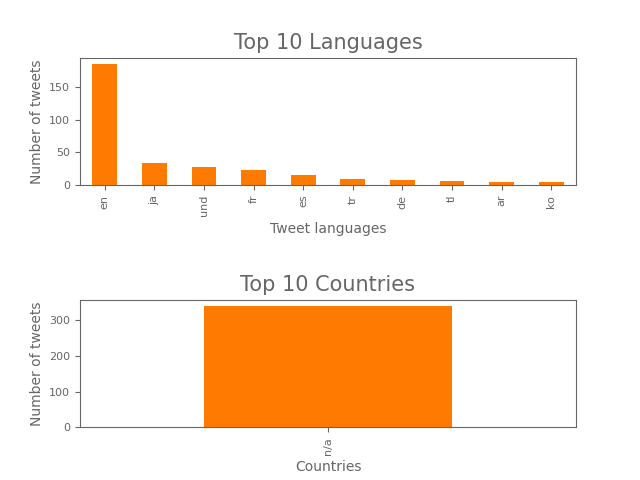

In [4]:
# Create our drawing space
fig = plt.figure()
fig.subplots_adjust(hspace = .9)

# Prepare to plot two charts on the same figure
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

# Style the axes
ax1.tick_params(axis='x', labelsize=8)
ax1.tick_params(axis='y', labelsize=8)
ax1.set_xlabel('Tweet languages', fontsize=10)
ax1.set_ylabel('Number of tweets', fontsize=10)
ax1.xaxis.label.set_color('#666666')
ax1.yaxis.label.set_color('#666666')
ax1.tick_params(axis='x', colors='#666666')
ax1.tick_params(axis='y', colors='#666666')
# Style the title
ax1.set_title('Top 10 Languages', fontsize=15, color='#666666')

# Plot the top 10 languages and appearance count using a bar chart
tweets_by_lang[:10].plot(ax=ax1, kind='bar', color='#FF7A00')

# Colour the spines (borders)
for spine in ax1.spines.values():
    spine.set_edgecolor('#666666')

# Second subplot
ax2.tick_params(axis='x', labelsize=8)
ax2.tick_params(axis='y', labelsize=8)
ax2.set_xlabel('Countries', fontsize=10)
ax2.set_ylabel('Number of tweets', fontsize=10)
ax2.xaxis.label.set_color('#666666')
ax2.yaxis.label.set_color('#666666')
ax2.tick_params(axis='x', colors='#666666')
ax2.tick_params(axis='y', colors='#666666')
# Style the title
ax2.set_title('Top 10 Countries', fontsize=15, color='#666666')

# Plot the top 10 tweet languages and appearance count using a bar chart
tweets_by_country[:10].plot(ax=ax2, kind='bar', color='#FF7A00')

# Colour the spines (borders)
for spine in ax2.spines.values():
    spine.set_edgecolor('#666666')
    
# Render the two graphs at once
plt.show()